## **Parte 2 - ejercicio práctico 5**

### **Análisis iniciales**

En esta parte del trabajo se hará un análisis de los precios del combustible en colombia en el año 2023.

In [37]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import missingno as msno
import matplotlib.pyplot as plt
from fancyimpute import IterativeImputer 

Lectura de datasets: 

In [2]:
combustible_1 = pd.read_csv("C:/Users/fonta/OneDrive/Documentos/CDD/6. Sexto semestre/Visualizacion de datos/Corte 1/Entrega2/Entrega 2/2023_I.csv")
combustible_2 = pd.read_csv("C:/Users/fonta/OneDrive/Documentos/CDD/6. Sexto semestre/Visualizacion de datos/Corte 1/Entrega2/Entrega 2/2023_II.csv")
combustible_3 = pd.read_csv("C:/Users/fonta/OneDrive/Documentos/CDD/6. Sexto semestre/Visualizacion de datos/Corte 1/Entrega2/Entrega 2/2023_III.csv")
combustible_4 = pd.read_csv("C:/Users/fonta/OneDrive/Documentos/CDD/6. Sexto semestre/Visualizacion de datos/Corte 1/Entrega2/Entrega 2/2023_IV.csv")

In [3]:
df_2023 = pd.concat([combustible_1, combustible_2, combustible_3, combustible_4], ignore_index=True)
df_2023.head(10)

,BANDERA,NOMBRE COMERCIAL,PRODUCTO,FECHA REGISTRO,DEPARTAMENTO,MUNICIPIO,VALOR PRECIO
0,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,DIESEL,01-Jan-2023,AMAZONAS,LA PEDRERA,15000.0
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.0
2,TERPEL,BALSA EL CONDOR,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
3,TERPEL,BALSA EL CONDOR,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10840.0
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
5,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
6,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10671.0
7,TEXACO,EDS COMDECOM ABRIAQUI,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,11870.0
8,TEXACO,EDS COMDECOM ABRIAQUI,DIESEL,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,10910.0
9,TEXACO,ESTACIÓN DE SERVICIO Y MALL SANTA LUCIA S.A.S.,DIESEL,01-Jan-2023,ANTIOQUIA,AMAGÁ,9610.0


In [5]:
df_2023.shape

(270276, 7)

Al hacer la únion de todos los trimenstres del 2023 y guardarlo en un nuevo dataframe: "df_2023", se tienen un total de 270.276 registros con 7 variables.

In [7]:
df_2023.columns

Index(['BANDERA', 'NOMBRE COMERCIAL', 'PRODUCTO', 'FECHA REGISTRO',
       'DEPARTAMENTO', 'MUNICIPIO', 'VALOR PRECIO'],
      dtype='object')

In [8]:
df_2023.columns=["bandera", "nombreCo", "producto","fecha","depto","munic","valor"]

En la variable "bandera" se tienen los nombres de las distribuidoras del combustible:

In [10]:
df_2023["bandera"].unique()

array(['TERPEL', 'TEXACO', 'PRIMAX', 'ZEUSS\xa0', 'BIOMAX',
       'PETROMIL\xa0', 'PETROBRAS', 'ESSO', 'BRIO\xa0', 'PUMA',
       'PLUS MAS', 'ECOS', 'OCTANO', 'AYATAWACOOP', 'DISCOWACOOP',
       'COOMULPINORT', 'DISCOM', 'P Y B', 'PETRODECOL', 'PETRDECOL',
       'SAVE', 'PROXXON', 'ZAPATA Y VELASQUEZ\xa0'], dtype=object)

In [127]:
len(df_2023["bandera"].unique())

23

**Productos**

In [12]:
df_2023["producto"].value_counts()

producto
GASOLINA MOTOR    124118
DIESEL            112801
EXTRA              33357
Name: count, dtype: int64

### **Filtrando por el tipo de producto**

Para poder hacer el estudio de cada uno de los tipos de combustibles filtremos nuestra base de datos.

In [211]:
gasolina=df_2023[df_2023["producto"]=="GASOLINA MOTOR"]
diesel =df_2023[df_2023["producto"]=="DIESEL"]
extra =df_2023[df_2023["producto"]=="EXTRA"]

In [168]:
gasolina.head()

,bandera,nombreCo,producto,fecha,depto,munic,valor
1,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.0
2,TERPEL,BALSA EL CONDOR,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
4,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
5,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
7,TEXACO,EDS COMDECOM ABRIAQUI,GASOLINA MOTOR,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,11870.0


In [100]:
diesel.head()

,bandera,nombreCo,producto,fecha,depto,munic,valor
0,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,DIESEL,01-Jan-2023,AMAZONAS,LA PEDRERA,15000.0
3,TERPEL,BALSA EL CONDOR,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10840.0
6,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,DIESEL,01-Jan-2023,AMAZONAS,LETICIA,10671.0
8,TEXACO,EDS COMDECOM ABRIAQUI,DIESEL,01-Jan-2023,ANTIOQUIA,ABRIAQUÍ,10910.0
9,TEXACO,ESTACIÓN DE SERVICIO Y MALL SANTA LUCIA S.A.S.,DIESEL,01-Jan-2023,ANTIOQUIA,AMAGÁ,9610.0


In [101]:
extra.head()

,bandera,nombreCo,producto,fecha,depto,munic,valor
15,TERPEL,ESTACION DE SERVICIO POPALITO,EXTRA,01-Jan-2023,ANTIOQUIA,BARBOSA,18760.0
16,TERPEL,ESTACION DE SERVICIO PUERTAS DEL NORDESTE,EXTRA,01-Jan-2023,ANTIOQUIA,BARBOSA,19400.0
20,PRIMAX,ESTACION DE SERVICIO PRIMAX AUTOPISTA,EXTRA,01-Jan-2023,ANTIOQUIA,BELLO,19580.0
21,TERPEL,TERPEL FONTIDUENO,EXTRA,01-Jan-2023,ANTIOQUIA,BELLO,20520.0
31,ZEUSS,ESTACION DE SERVICIO LA CRISTALINA,EXTRA,01-Jan-2023,ANTIOQUIA,CISNEROS,20000.0


#### **Gasolina**

Veamos como se comporta el valor de la gasolina en el 2023

In [212]:
gasolina["valor"].describe()

count    124118.000000
mean      11511.661371
std        2150.744335
min        1000.000000
25%        9721.000000
50%       11200.000000
75%       13148.000000
max       26000.000000
Name: valor, dtype: float64

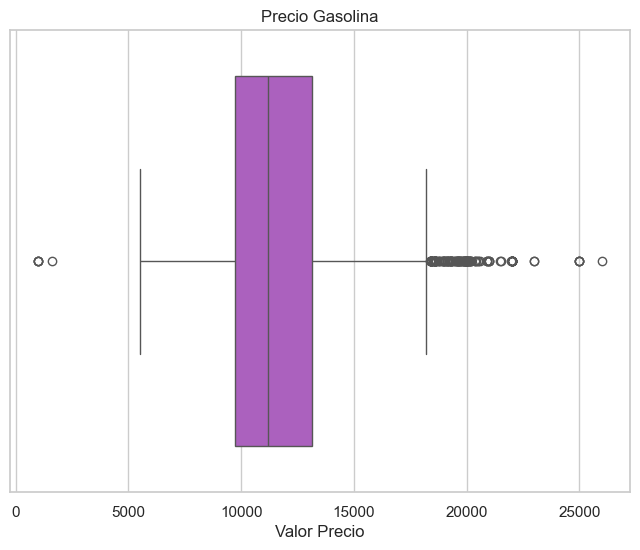

In [213]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=gasolina, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Gasolina')
plt.show()

In [171]:
print("Datos faltantes: ",gasolina["valor"].isna().sum())

Datos faltantes:  0


Con lo anterior, vemos que no existen datos faltantes, pero el boxplot muestra la presencia de datos atípicos, los cuales buscaremos imputar.

In [214]:
def detect_outliers_zscore(data):
    outliers = []
    thres = 3
    mean = np.mean(data)
    std = np.std(data)
    for idx, value in enumerate(data):
        z_score = (value - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(idx)
    
    return outliers

In [215]:
out=detect_outliers_zscore(gasolina["valor"])
len(out)

194

Existen 194 valores atípicos en el precio de la gasolina, hagamos su respectiva imputación.

In [216]:
gasolina.iloc[out, gasolina.columns.get_loc('valor')] = np.nan

In [217]:
imp = IterativeImputer(max_iter=5, random_state=500)

# Imputar los datos faltantes
gasolina_imputado = gasolina.copy()
gasolina_imputado[['valor']] = imp.fit_transform(gasolina[['valor']])


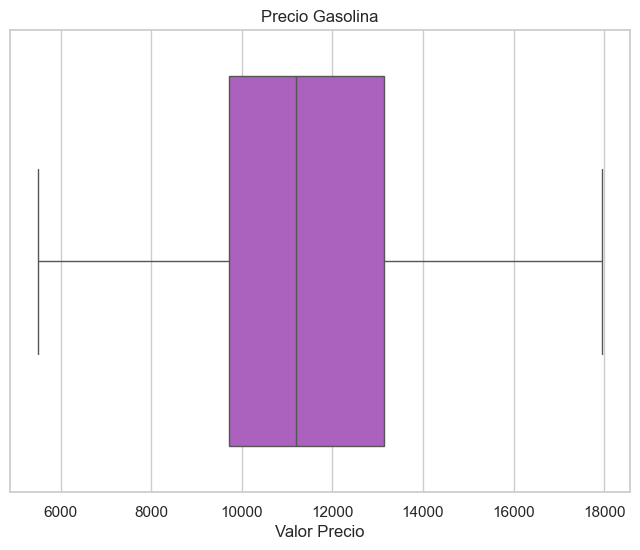

In [218]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=gasolina_imputado, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Gasolina')
plt.show()

Con esto se logró hacer la imputacion de los valores extremos del precio de la gasolina en 2023, detectamos los valores atípicos con los z_scores, e imputamos con el metodo iterativo. La idea es realizar este mismo proceso con los otros dos productos.

##### **Otros análisis:**

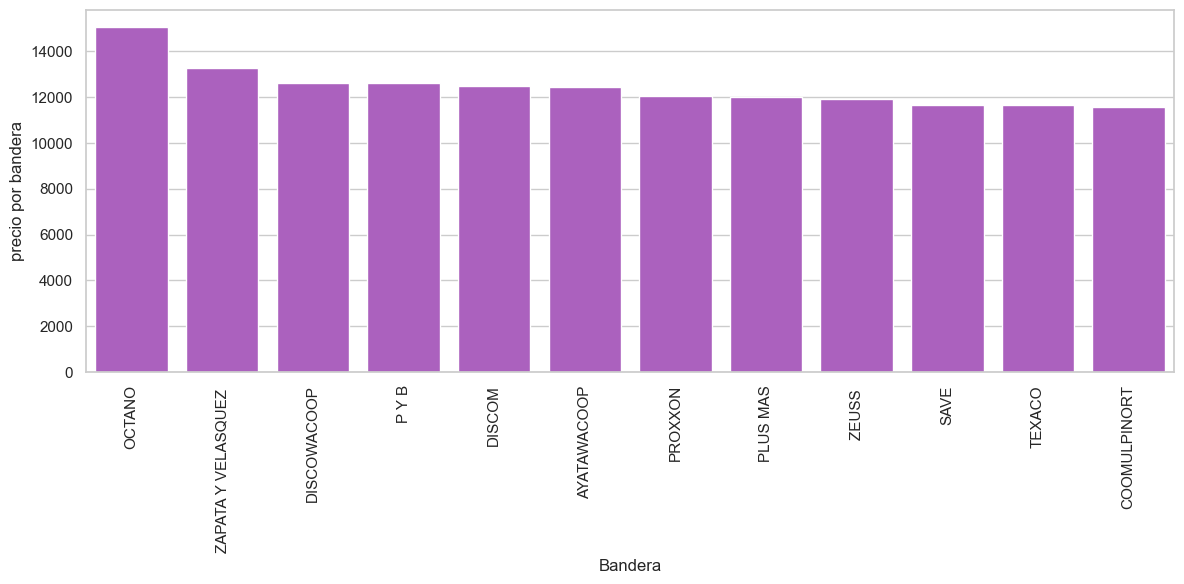

In [177]:
gas_bandera = gasolina_imputado.groupby('bandera')['valor'].mean().reset_index()
gas_bandera = gas_bandera.sort_values(by='valor',ascending=False)
gas_bandera=gas_bandera.head(12)

plt.figure(figsize=(12, 6))
sns.barplot(data=gas_bandera, x='bandera', y='valor', color='#B452CD')
plt.xlabel('Bandera')
plt.ylabel('precio por bandera')
plt.xticks(rotation=90)
plt.tight_layout()


In [178]:
gas_bandera

,bandera,valor
8,OCTANO,15055.586120
21,ZAPATA Y VELASQUEZ,13256.937617
5,DISCOWACOOP,12626.782638
9,P Y B,12623.236066
4,DISCOM,12473.824951
0,AYATAWACOOP,12460.534267
16,PROXXON,12071.214107
14,PLUS MAS,12020.698180
22,ZEUSS,11941.724569
18,SAVE,11677.948148


De la gráfica anterior,se muestran las 12 empresas distribuidoras de gasolina con los precios mas altos en colombia en el 2023. siendo "OCTANO" con el valor mas alto 15055. 

#### ****Diesel****

In [179]:
diesel["valor"].describe()

count    112801.000000
mean       9145.494473
std         908.419814
min           0.000000
25%        8750.000000
50%        9245.000000
75%        9580.000000
max       71590.000000
Name: valor, dtype: float64

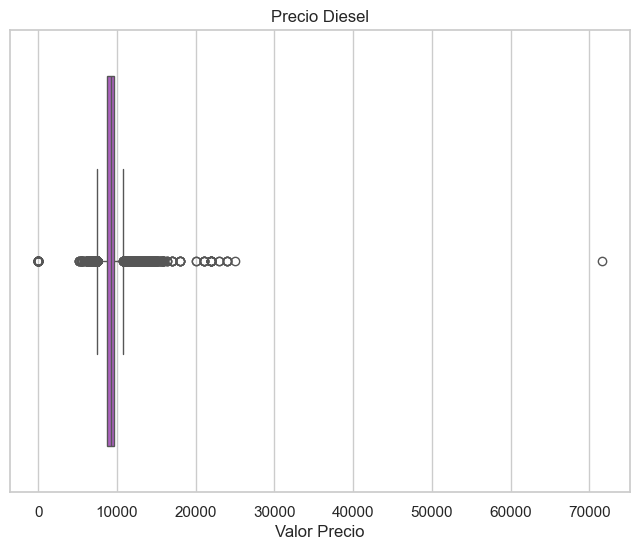

In [180]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=diesel, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Diesel')
plt.show()

In [181]:
print("Datos faltantes: ",diesel["valor"].isna().sum())

Datos faltantes:  0


Vemos que en el precio del diesel, tampoco hay valores faltantes pero si una gran cantidad de valores atípicos.

In [182]:
def detect_outliers_zscore2(data):
    outliers = []
    thres = 2
    mean = np.mean(data)
    std = np.std(data)
    for idx, value in enumerate(data):
        z_score = (value - mean) / std
        if np.abs(z_score) > thres:
            outliers.append(idx)
    
    return outliers

In [183]:
out=detect_outliers_zscore2(diesel["valor"])
len(out)

5408

Existen 8614 valores por fuera de 2*RIQ.

In [184]:
diesel.iloc[out, diesel.columns.get_loc('valor')] = np.nan

In [185]:
imp = IterativeImputer(max_iter=5, random_state=500)

# Imputar los datos faltantes
diesel_imputado = diesel.copy()
diesel_imputado[['valor']] = imp.fit_transform(diesel[['valor']])

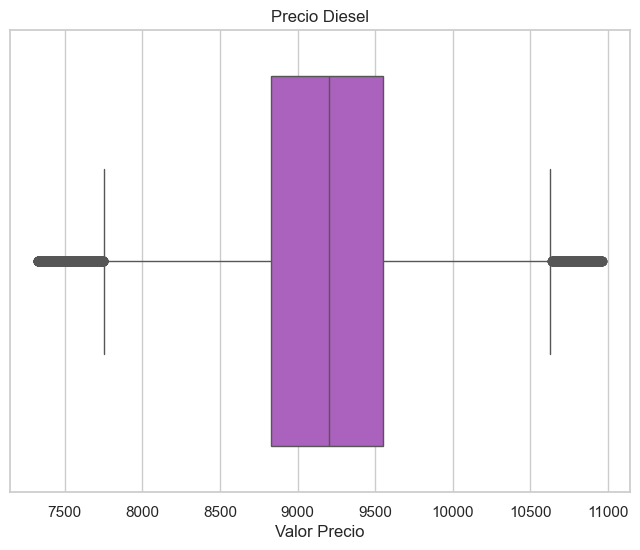

In [186]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=diesel_imputado, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Diesel')
plt.show()

Vemos que en este caso, a diferencia de la gasolina, parece ser que no se detectaron todos los datos, puesto que nuestra función para detectarlos solo está tomando los que están por fuera de 2 veces el RIQ. Pero aun así hubo una gran mejoría con la imputación de los datos más extremos.

##### **Otros análisis:**

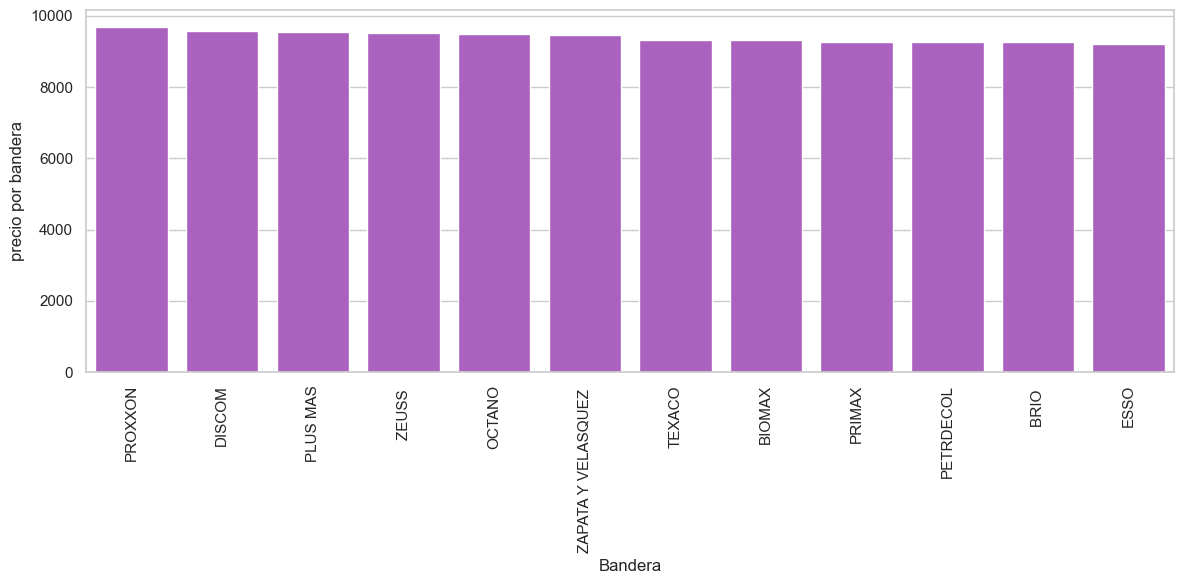

In [189]:
diesel_bandera = diesel_imputado.groupby('bandera')['valor'].mean().reset_index()
diesel_bandera = diesel_bandera.sort_values(by='valor',ascending=False)
diesel_bandera=diesel_bandera.head(12)

plt.figure(figsize=(12, 6))
sns.barplot(data=diesel_bandera, x='bandera', y='valor', color='#B452CD')
plt.xlabel('Bandera')
plt.ylabel('precio por bandera')
plt.xticks(rotation=90)
plt.tight_layout()

In [190]:
diesel_bandera

,bandera,valor
16,PROXXON,9683.888889
4,DISCOM,9569.589836
14,PLUS MAS,9547.763667
22,ZEUSS,9508.791191
8,OCTANO,9493.000870
21,ZAPATA Y VELASQUEZ,9468.124604
20,TEXACO,9333.599629
1,BIOMAX,9312.636716
15,PRIMAX,9281.352108
10,PETRDECOL,9278.136379


Vemos con este análisis que el precio del diesel por bandera no cambia mucho, estas 12 empresas con el diesel mas alto tienen precios cercanos a 9.300.

#### ****Extra****

In [191]:
extra["valor"].describe()

count     33357.000000
mean      18818.501244
std        2878.162380
min        1000.000000
25%       18890.000000
50%       19490.000000
75%       19980.000000
max      200000.000000
Name: valor, dtype: float64

Desde este punto ya podemos hacernos una idea de que ese valor máximo en el valor del combustible extra puede ser un error de digitación.

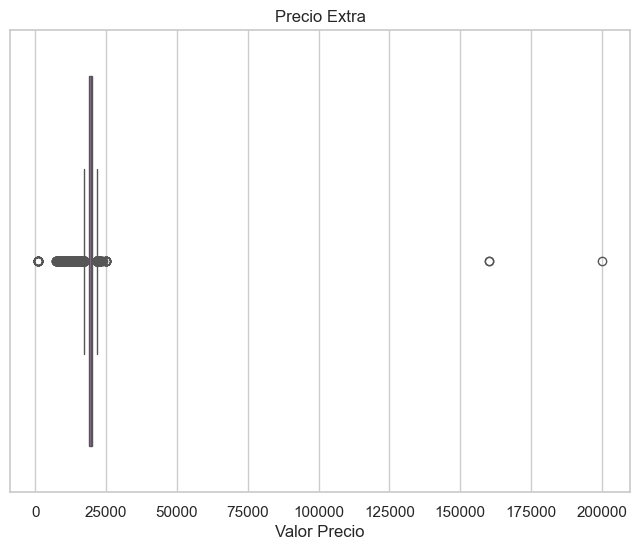

In [192]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=extra, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Extra')
plt.show()

In [193]:
print("Datos faltantes: ",extra["valor"].isna().sum())

Datos faltantes:  0


Este es el peor de los casos entre los 3 productos, la distribución de la variable no es clara, por tanto se necesita de la imputación, en este caso tampoco se tienen datos faltantes.

In [194]:
out=detect_outliers_zscore2(extra["valor"])
len(out)

2373

Existen 2373 datos por fuera de 2*RIQ.

In [195]:
extra.iloc[out, extra.columns.get_loc('valor')] = np.nan

In [196]:
imp = IterativeImputer(max_iter=5, random_state=500)

# Imputar los datos faltantes
extra_imputado = extra.copy()
extra_imputado[['valor']] = imp.fit_transform(extra[['valor']])

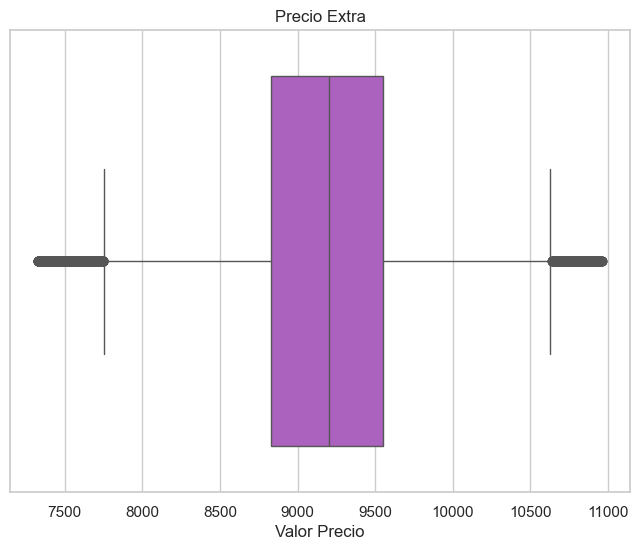

In [197]:
sns.set(style="whitegrid")

plt.figure(figsize=(8, 6))
ax = sns.boxplot(x='valor', data=diesel_imputado, color="#B452CD")

ax.set_xlabel("Valor Precio")
plt.title('Precio Extra')
plt.show()

En el caso del combustible extra pasó algo similar a con el diesel, con la imputación mejoró la distribución de la variable, aun cuando se siguen presentando datos atípicos, esto es razonable, puesto que el valor del extra varía en gran manera.

##### **Otros análisis:**

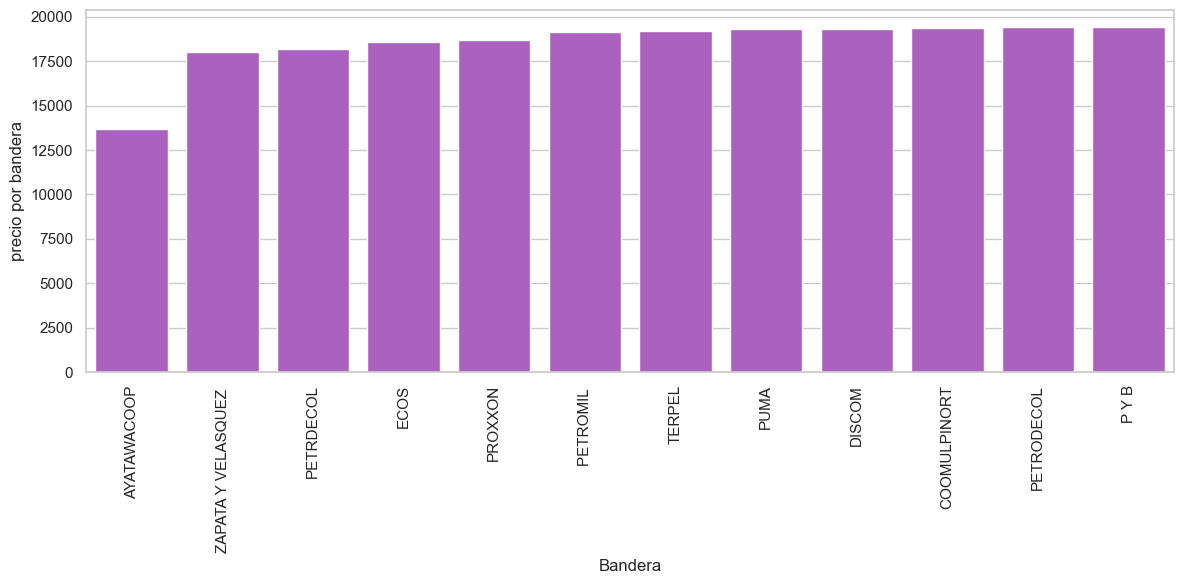

In [198]:
extra_bandera = extra_imputado.groupby('bandera')['valor'].mean().reset_index()
extra_bandera = extra_bandera.sort_values(by='valor',ascending=True)
extra_bandera=extra_bandera.head(12)

plt.figure(figsize=(12, 6))
sns.barplot(data=extra_bandera, x='bandera', y='valor', color='#B452CD')
plt.xlabel('Bandera')
plt.ylabel('precio por bandera')
plt.xticks(rotation=90)
plt.tight_layout()

In [199]:
extra_bandera

,bandera,valor
0,AYATAWACOOP,13689.153846
20,ZAPATA Y VELASQUEZ,18047.000000
9,PETRDECOL,18195.088471
5,ECOS,18578.220683
15,PROXXON,18687.927373
12,PETROMIL,19142.545696
18,TERPEL,19191.113516
16,PUMA,19316.733195
4,DISCOM,19337.311812
3,COOMULPINORT,19346.604275


Puesto que el combustible "Extra" es el que tiene el precio promedio mas alto, con la grafica anterior vemos que la bandera "AYATAWACOOP" es el que tiene menor precio promedio 13.600, a diferencia de las otras empresas que sus precios ya rodean los 20.000 pesos colombianos.

### **Georeferenciación: precio de la gasolina por departamento**

In [200]:
import geopandas as gpd 
import descartes    

In [250]:
mapa_col = gpd.read_file("COLOMBIA/COLOMBIA.shp")

In [251]:
gasolina_map=gasolina_imputado.copy()

In [252]:

dpto_1 = gasolina_map['depto'].str.lower()
dpto_2 = mapa_col['DPTO_CNMBR'].str.lower()

# Encontrar los índices donde los valores de dpto_1 no están en dpto_2
M1 = np.where(~dpto_1.isin(dpto_2))[0]  # Retorna los índices de los valores no coincidentes

# Reemplazar "?" con "ñ" en dpto_2
dpto_2 = dpto_2.str.replace("\?", "ñ", regex=True)

# Reemplazar "archipielago de san andres" con el texto completo en dpto_2
dpto_2 = dpto_2.str.replace("archipielago de san andres", 
                            "archipielago de san andres, santa catalina y providencia", regex=False)

M1 = np.where(~dpto_1.isin(dpto_2))[0] 

# Añadir las columnas 'codigo' con los valores modificados
gasolina_map.loc[:, 'codigo'] = dpto_1
mapa_col.loc[:, 'codigo'] = dpto_2

In [253]:
gasolina_map["codigo"] = dpto_1
mapa_col["codigo"] = dpto_2

In [254]:
Datos_tot = pd.merge(mapa_col, gasolina_map , on ='codigo', how = 'outer')
Datos_tot.head(3)

,OBJECTID,DPTO_CCDGO,DPTO_NANO_,DPTO_CNMBR,DPTO_CACTO,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,geometry,codigo,bandera,nombreCo,producto,fecha,depto,munic,valor
0,28,91,1991,AMAZONAS,Decreto 2274 del 4 de Octubre de la Constituci...,1.100465e+11,3,2005,28,24.747842,8.921607,"POLYGON ((-71.29212 0.06821, -71.28829 0.06762...",amazonas,TERPEL,ESTACION DE SERVICIO SERVICENTRO LA PEDRERA,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LA PEDRERA,15500.0
1,28,91,1991,AMAZONAS,Decreto 2274 del 4 de Octubre de la Constituci...,1.100465e+11,3,2005,28,24.747842,8.921607,"POLYGON ((-71.29212 0.06821, -71.28829 0.06762...",amazonas,TERPEL,BALSA EL CONDOR,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0
2,28,91,1991,AMAZONAS,Decreto 2274 del 4 de Octubre de la Constituci...,1.100465e+11,3,2005,28,24.747842,8.921607,"POLYGON ((-71.29212 0.06821, -71.28829 0.06762...",amazonas,TERPEL,ESTACION DE SERVICIO DISTRIBUIDORA LOS COMUNEROS,GASOLINA MOTOR,01-Jan-2023,AMAZONAS,LETICIA,11380.0


In [255]:
datos_unidos2 = (
    Datos_tot
    .groupby(['codigo', 'DPTO_NANO_', 'DPTO_NAREA', 'DPTO_CSMBL', 'DPTO_NANO', 'PAIS_PAIS_', 'SHAPE_Leng', 'SHAPE_Area'], as_index=False)  # Agrupa los datos y evita usar los grupos como índice
    .agg(precio_prom_dpto=('valor', 'mean'))  # Calcula la media de 'valor' y la asigna a 'precio_prom_dpto'
)

In [256]:
datos_unidos2

,codigo,DPTO_NANO_,DPTO_NAREA,DPTO_CSMBL,DPTO_NANO,PAIS_PAIS_,SHAPE_Leng,SHAPE_Area,precio_prom_dpto
0,amazonas,1991,1.100465e+11,3,2005,28,24.747842,8.921607,13328.388102
1,antioquia,1886,6.306333e+10,3,2005,1,21.137035,5.155783,12067.008808
2,arauca,1991,2.380556e+10,3,2005,25,9.162939,1.940327,11894.656981
3,"archipielago de san andres, santa catalina y p...",1991,4.960214e+04,3,2005,12,0.650698,0.004064,13112.397849
4,atlantico,1910,3.326730e+09,3,2005,2,2.461077,0.274825,11418.952548
5,bogota d.c.,0,1.633209e+09,3,2005,3,3.731288,0.133045,11521.983851
6,bolivar,1886,2.666559e+10,3,2005,4,15.706980,2.191055,11575.244924
7,boyaca,1886,2.307705e+10,3,2005,5,15.280968,1.883315,12160.182093
8,caldas,1905,7.415933e+09,3,2005,6,6.614200,0.604712,11913.007037
9,caqueta,1981,9.007665e+10,3,2005,7,19.850907,7.316017,12169.220745


In [ ]:
mapa_col['promedio_precio'] = datos_unidos2["precio_prom_dpto"]

mapa_col

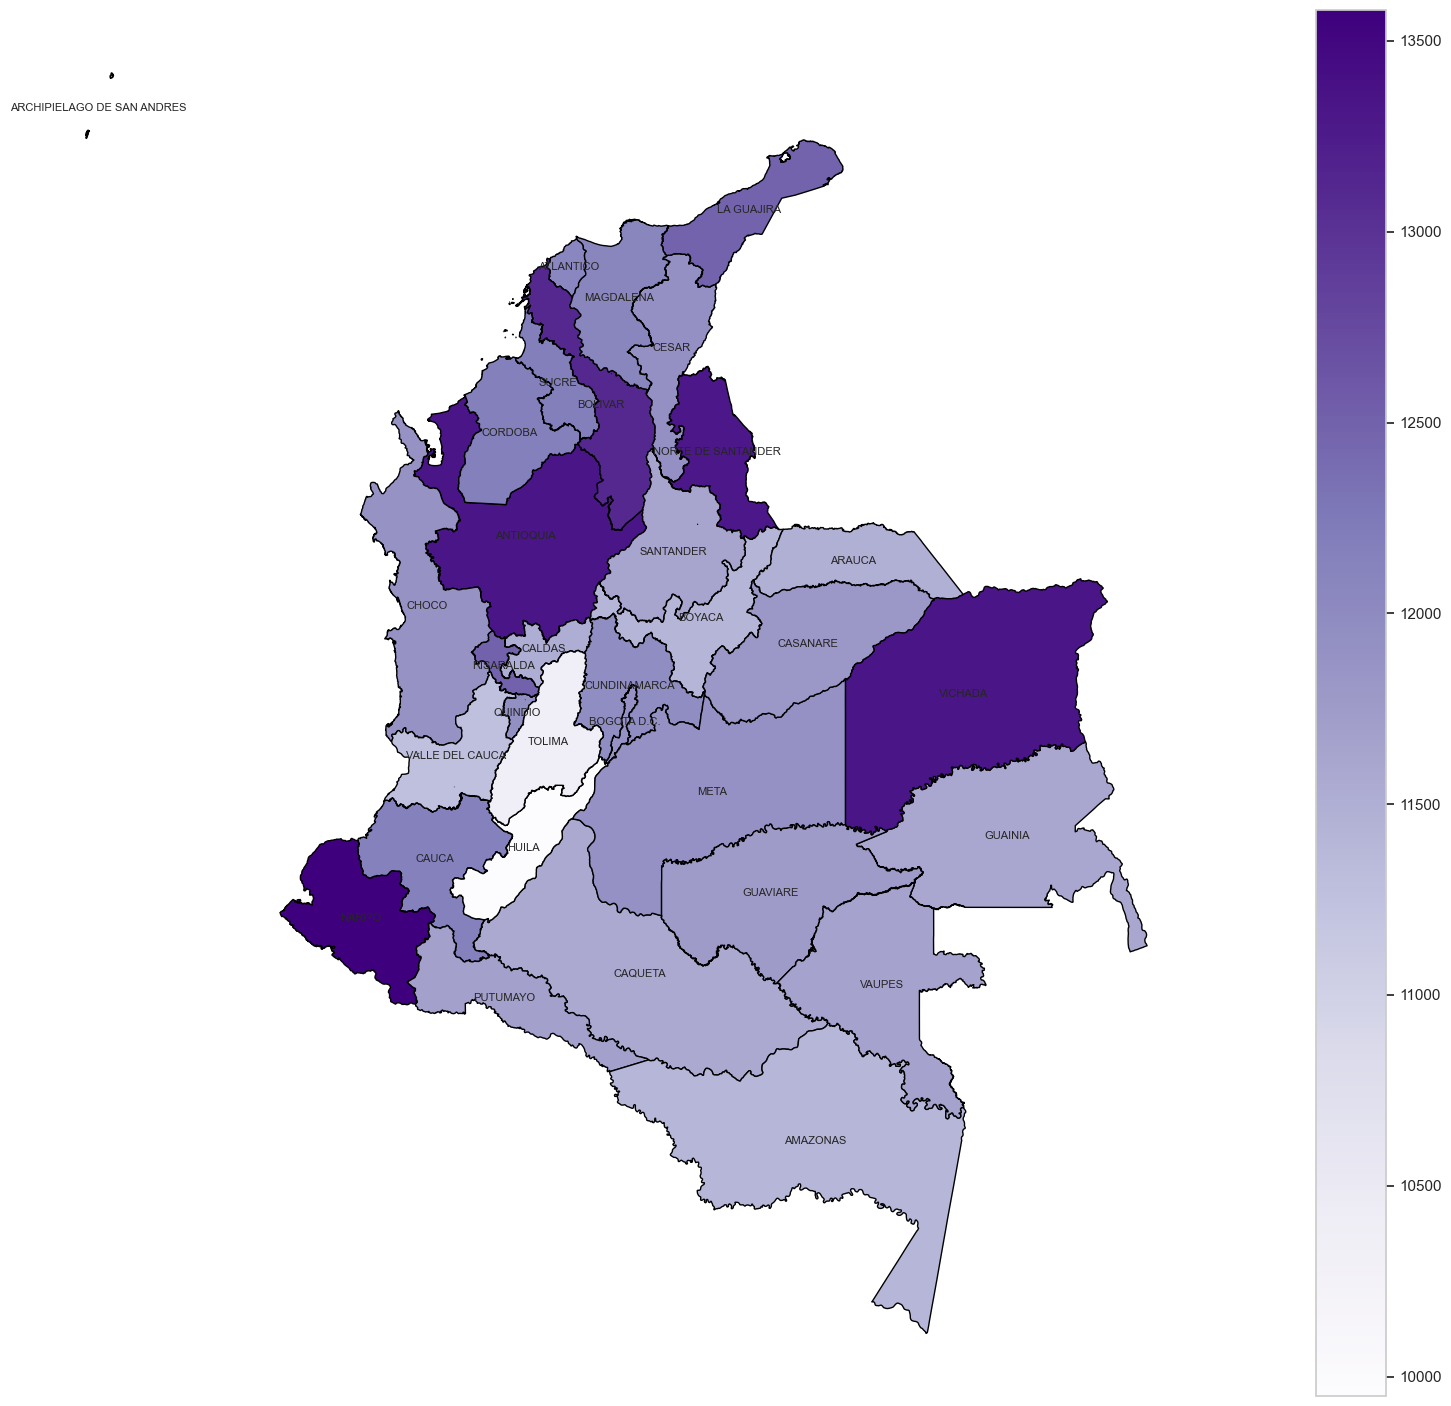

In [272]:
mapa_col.plot(column="promedio_precio",figsize=(30,18), legend=True, edgecolor="black",cmap="Purples")

# Los siguientes códigos permiten incluir los nombres de los municipios
for index,row in mapa_col.iterrows():
    xy=row['geometry'].centroid.coords[:]
    xytext=row['geometry'].centroid.coords[:]
    plt.annotate(row['DPTO_CNMBR'],xy=xy[0], xytext=xytext[0],  horizontalalignment='center',verticalalignment='center',fontsize=8)
    plt.axis('off')
